## Analyse and  Sales Prediction process: 





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
sales_train_df = pd.read_csv("train.csv")
sales_train_df.head()

/var/folders/y0/v8s1rk113f5gqq_dvtthdf840000gn/T/ipykernel_24836/415405706.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv("train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
sales_train_df.info()
#1017209 rows and 9 columns(variables), the sales is the target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### Average sales amount per day = 5773 Euros,  maximum sales per day = 41551
### Average number of customers = 633, maximum number of customers = 7388

In [4]:
sales_train_df.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
#checking the missing data in sales_train_df
missing_data = sales_train_df.isnull().sum()
print(missing_data)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [6]:
duplicate_rows = sales_train_df[sales_train_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []


In [7]:
duplicate_count = sales_train_df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


## Clean and transform Data
### 1. convert the Date column to data
### 2. Extract the Date features for better analysis

In [8]:
#change the column name from date to TransactionDate to avoid the conflicts
sales_train_df.rename(columns={'Date': 'TransactionDate'}, inplace=True)

In [9]:
sales_train_df

,Store,DayOfWeek,TransactionDate,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [10]:
sales_train_df['TransactionDate'] = pd.to_datetime(sales_train_df['TransactionDate'])
sales_train_df['Year'] = sales_train_df['TransactionDate'].dt.year
sales_train_df['Month'] = sales_train_df['TransactionDate'].dt.month
sales_train_df['Day'] = sales_train_df['TransactionDate'].dt.day
sales_train_df['DayOfWeek'] = sales_train_df['TransactionDate'].dt.dayofweek

In [11]:
print(sales_train_df['TransactionDate'].dtype)

datetime64[ns]


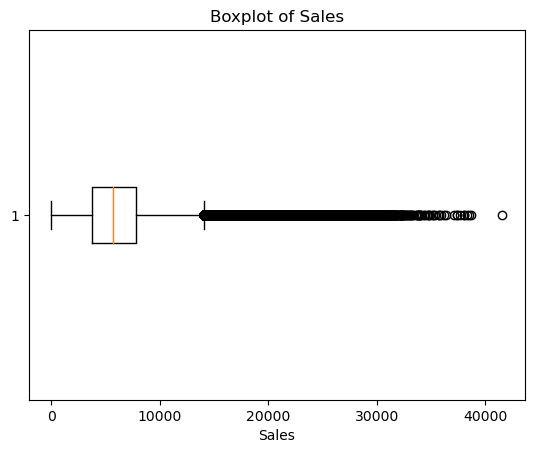

In [12]:
# using boxplot to detect the outlier 
plt.boxplot(sales_train_df['Sales'], vert = False)
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()

### There are many sales values significantly higher than the majority, The data is right-skewed, meaning a small number of stores have high sales.

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'TransactionDate'}>],
       [<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>],
       [<Axes: title={'center': 'Promo'}>,
        <Axes: title={'center': 'SchoolHoliday'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>, <Axes: >]], dtype=object)

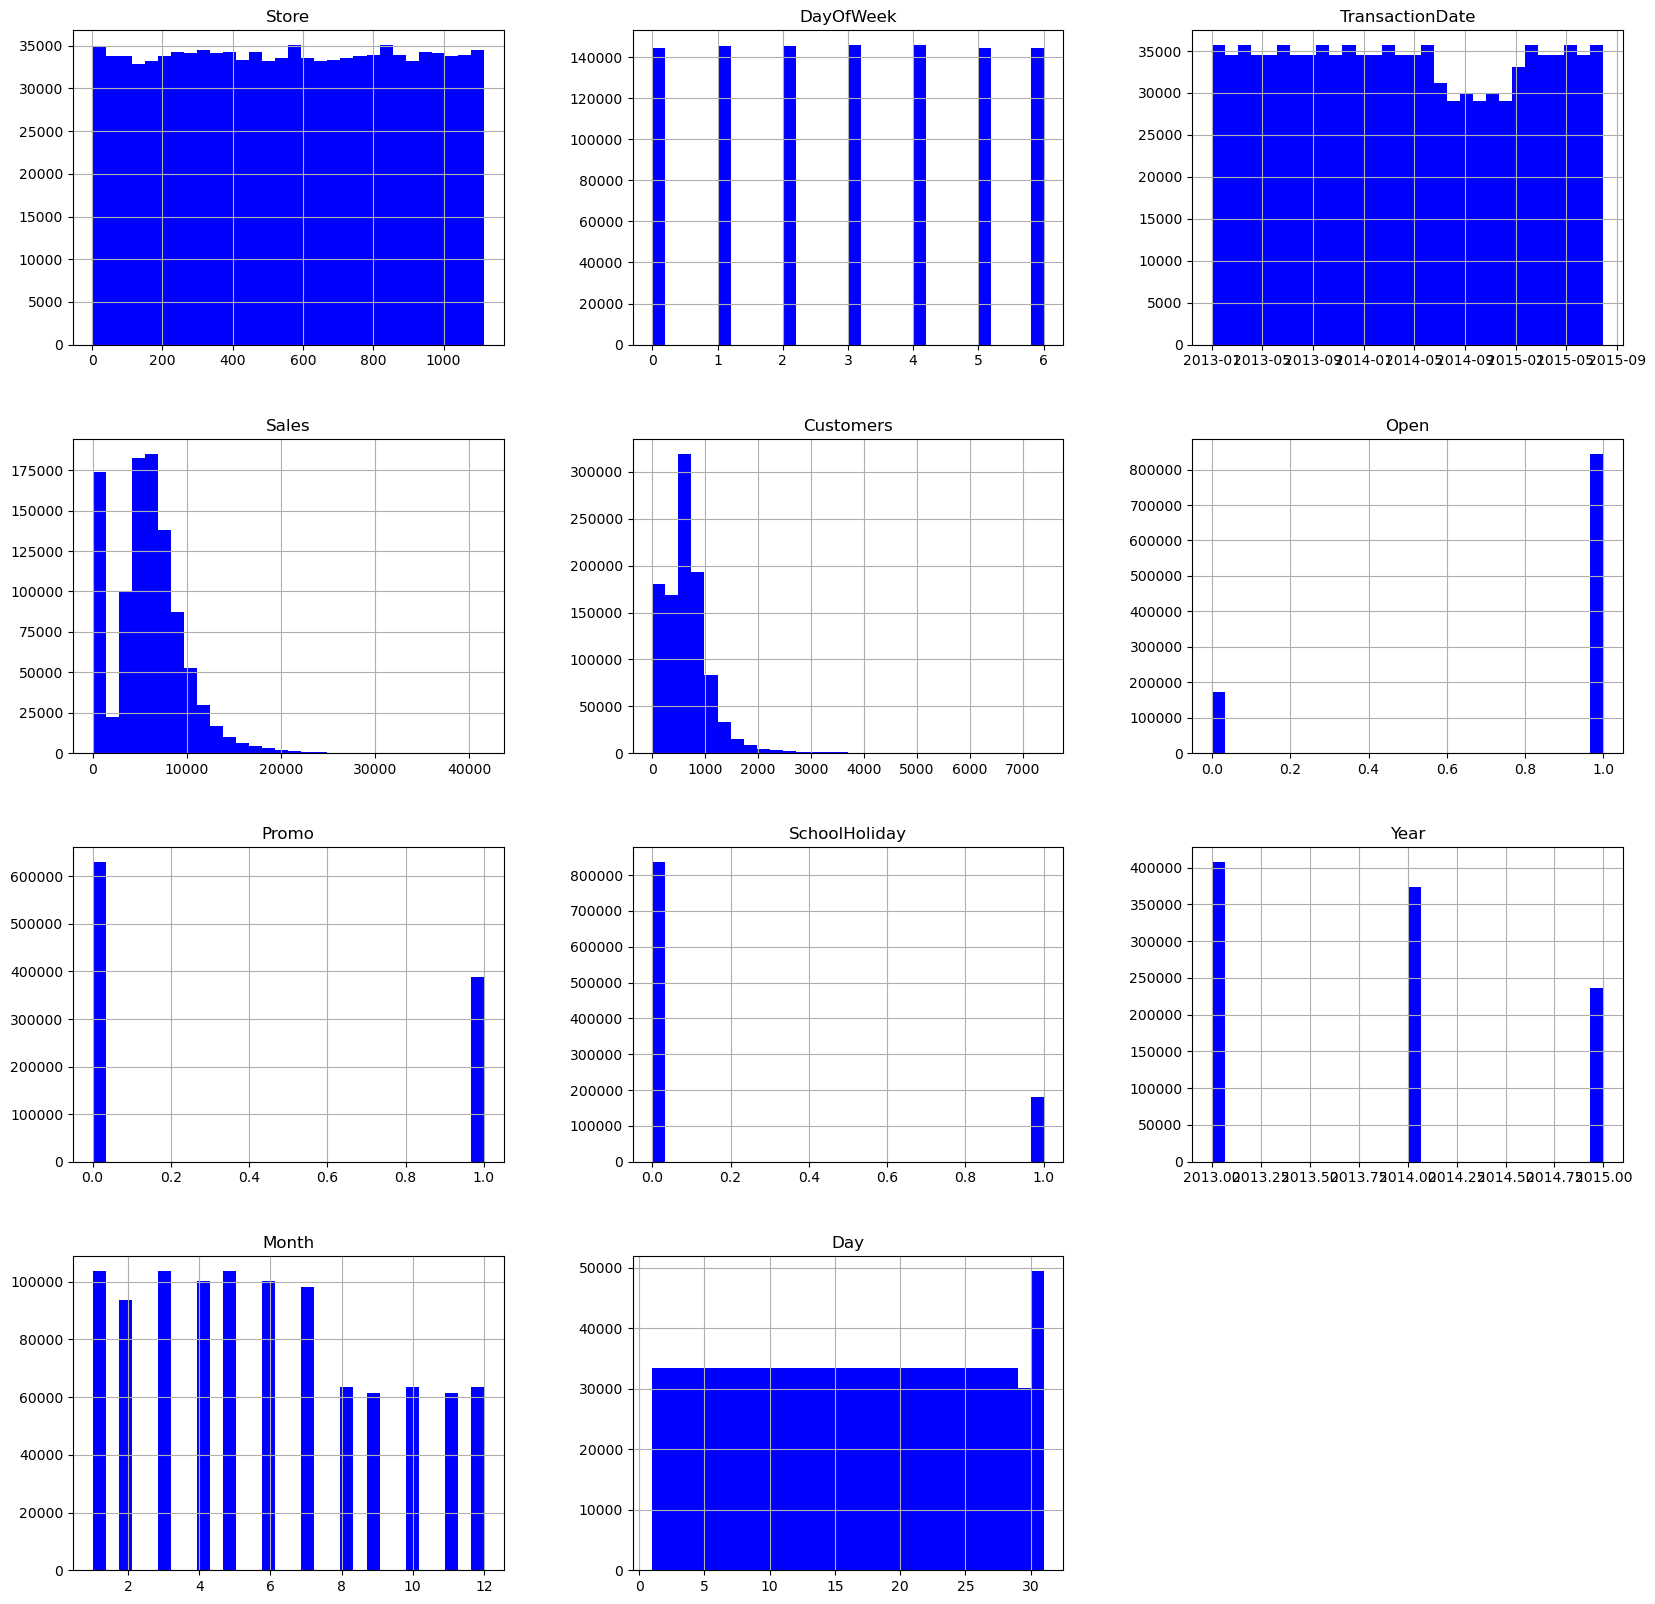

In [13]:
sales_train_df.hist(bins=30, figsize=(20, 20), color='b')

In [14]:
# read the store dataset
store_df = pd.read_csv("store.csv")
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [15]:
store_df.info()
#1115 rows and 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### on average, the competition distance is 5404 meters away 

In [16]:
store_df.describe()


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [17]:
#check Missing values
missing_store_df = store_df.isnull().sum()
print(missing_store_df)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [18]:

sales_train_df.describe()
# the average of sales  = 6995 Euros(original 5773 Euros)
# the average number of customers = 762 (original 633)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,2.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.800000e+02,1.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00
50%,5.580000e+02,3.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01
75%,8.380000e+02,5.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01
max,1.115000e+03,6.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01


In [19]:
# check the missing data in store dataframe
store_missing = store_df.isnull().sum()
print(store_missing)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [20]:
# look the missing data in CompetitionDistance  
store_df[store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [21]:
store_df[store_df['Promo2']==0]
#if promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [22]:
# fill with 0 in missing data
mis_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for cols in mis_cols:
    store_df[cols].fillna(0, inplace = True)
    

In [23]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
### store_info_df['CompetitionDistance'].mean()  = 5404.90

In [24]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)

In [25]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

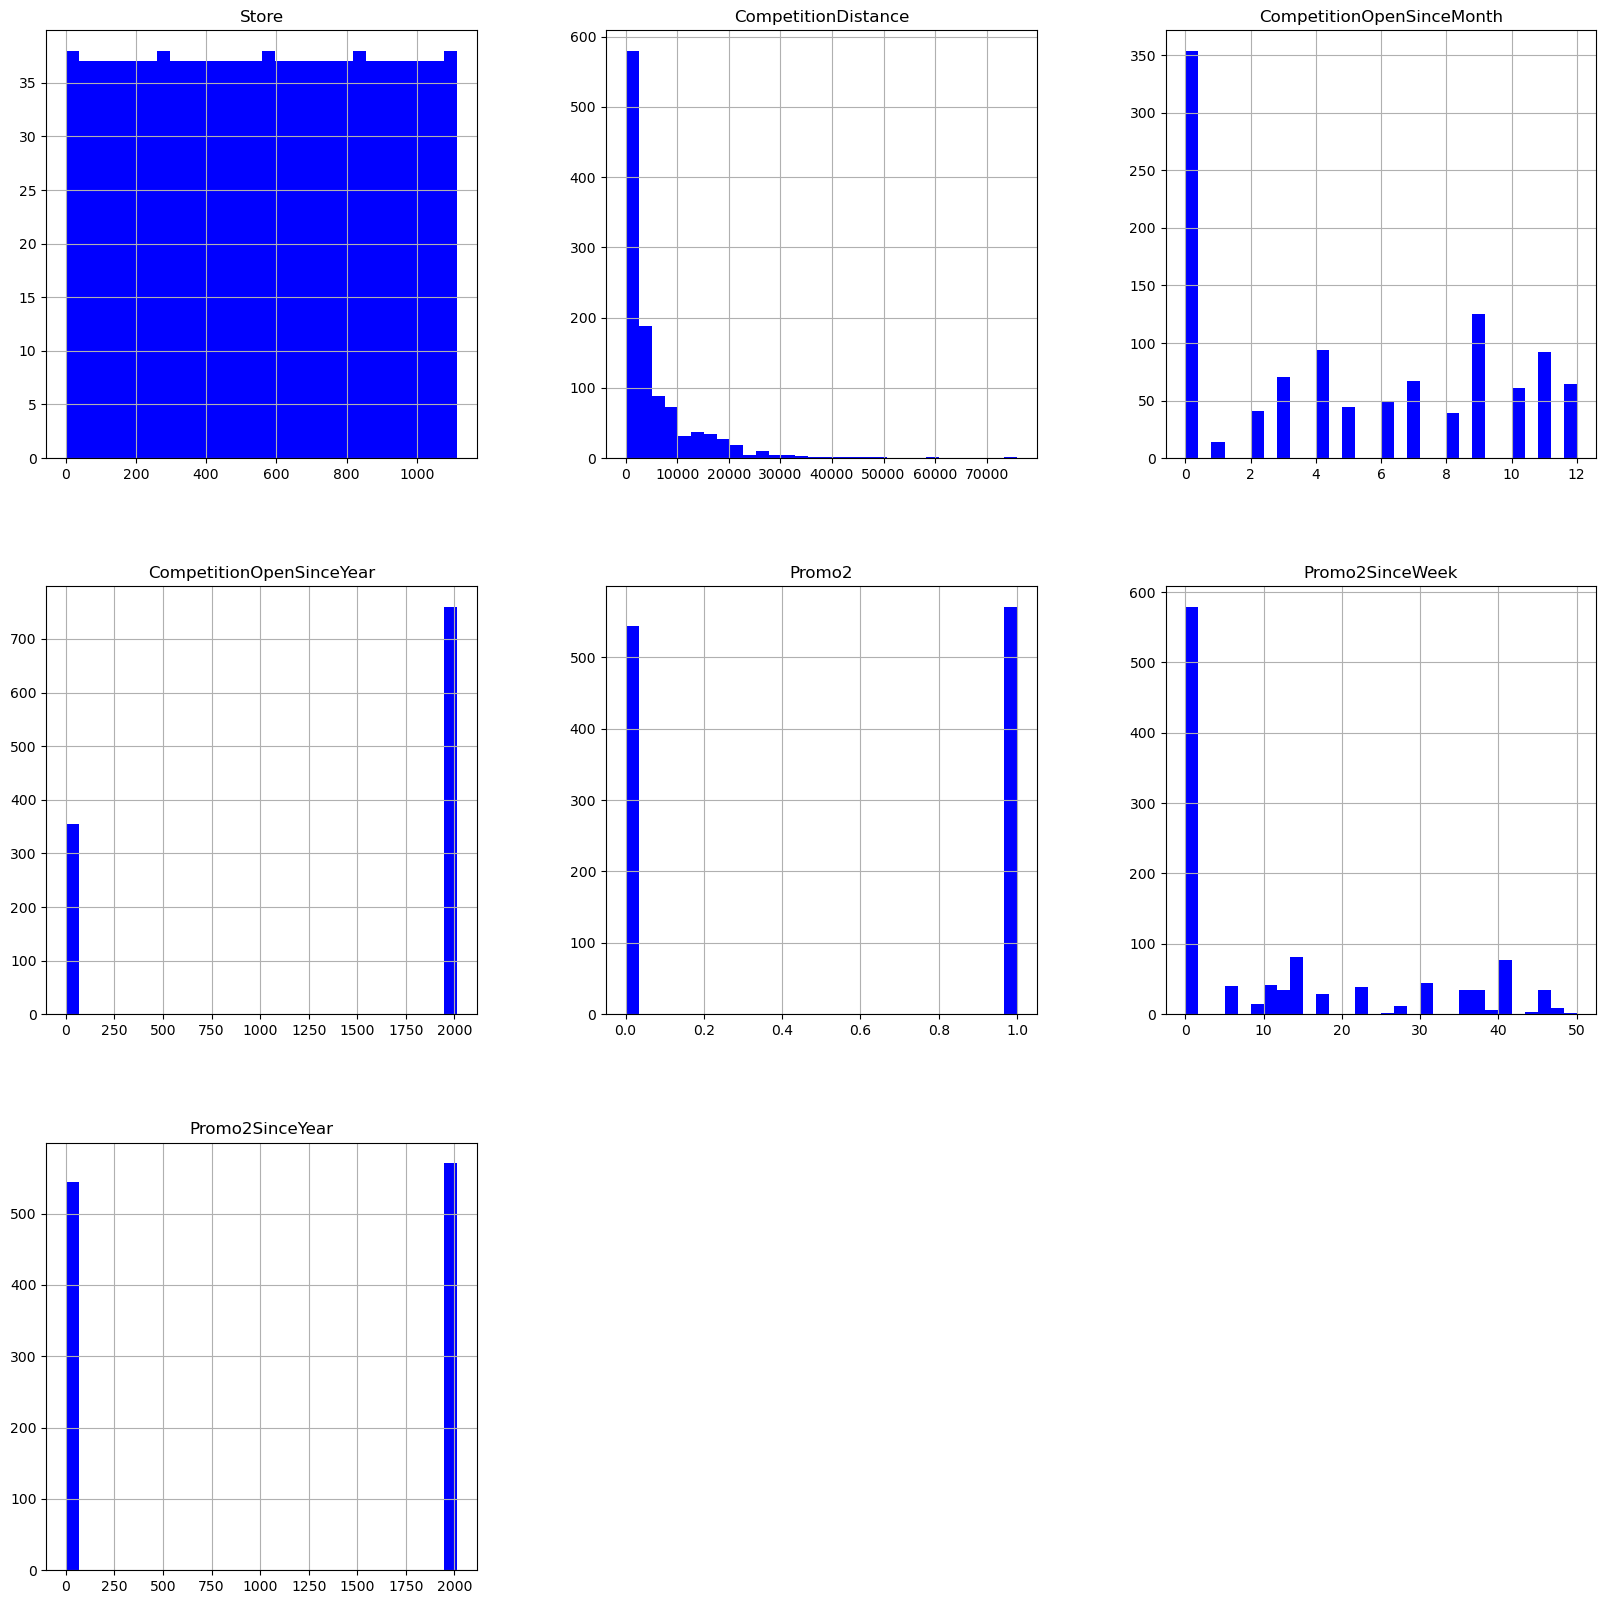

In [26]:
store_df.hist(bins = 30, figsize =(20,20), color = 'b')
# half of the stores have their competition at a distance of 0-3000m (3 kms away)

In [27]:
#merge the sales and store data
sales_merged_df = pd.merge(sales_train_df, store_df, on = 'Store', how = 'inner')

sales_merged_df = sales_merged_df[sales_merged_df['Open']==1] # only considerr when store is open

sales_merged_df

,Store,DayOfWeek,TransactionDate,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,3,2015-07-30,5020,546,1,1,0,1,2015,...,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,2,2015-07-29,4782,523,1,1,0,1,2015,...,29,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,1,2015-07-28,5011,560,1,1,0,1,2015,...,28,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,0,2015-07-27,6102,612,1,1,0,1,2015,...,27,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,0,2013-01-07,6905,471,1,1,0,1,2013,...,7,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017204,1115,5,2013-01-05,4771,339,1,0,0,1,2013,...,5,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,4,2013-01-04,4540,326,1,0,0,1,2013,...,4,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,3,2013-01-03,4297,300,1,0,0,1,2013,...,3,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [28]:
sales_merged_df.isnull().sum() #make sure no missing value

Store                        0
DayOfWeek                    0
TransactionDate              0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Which Days or Months Have the Average Highest Sales? Why?


In [29]:
#group by day of week and months, use average 

sales_by_day = sales_merged_df.groupby('DayOfWeek')['Sales'].mean().sort_values(ascending=False)
print(sales_by_day)

sales_by_month = sales_merged_df.groupby('Month')['Sales'].mean().sort_values(ascending=False)

print(sales_by_month)

DayOfWeek
6    8224.723908
0    8216.073074
1    7088.113656
4    7072.677012
3    6767.310159
2    6728.122978
5    5874.840238
Name: Sales, dtype: float64
Month
12    8608.956661
11    7188.554250
5     7106.453154
4     7046.228420
6     7000.978190
3     6976.412026
7     6952.682125
8     6648.984654
10    6602.843354
2     6589.165535
1     6563.690444
9     6546.343035
Name: Sales, dtype: float64


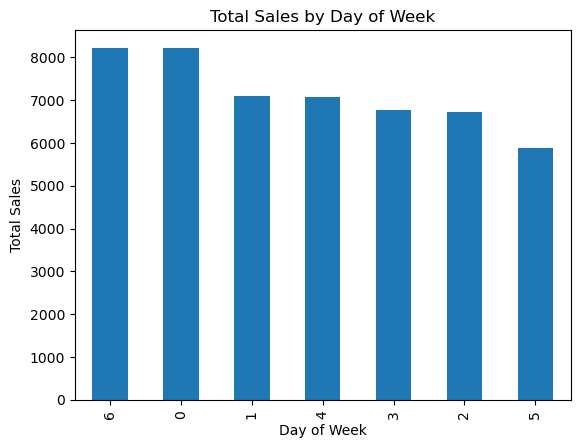

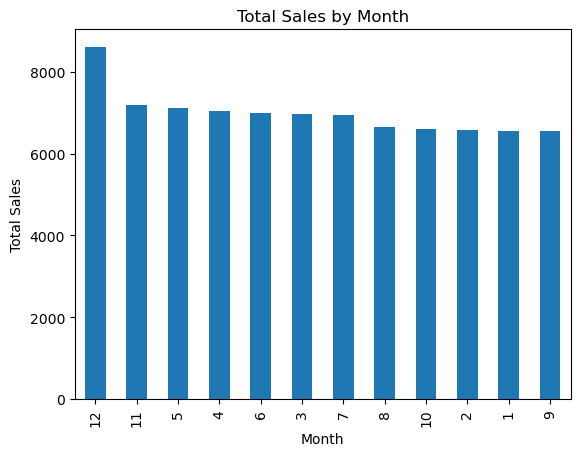

In [30]:
sales_by_day.plot(kind = 'bar', title='Total Sales by Day of Week', xlabel = 'Day of Week', ylabel='Total Sales')
plt.show()

sales_by_month.plot(kind = 'bar', title='Total Sales by Month', xlabel='Month', ylabel='Total Sales')
plt.show()                  

### the highest total Sales by month is March, july, the highest average sales by month is December

In [31]:
#Highest Sales by MOnth 
Highest_sales_by_month = sales_merged_df.groupby('Month')['Sales'].sum().sort_values(ascending=False)

print(Highest_sales_by_month)

Month
3     599831906
7     595059205
6     578112775
4     575895295
5     569248217
1     566728724
2     528734410
12    433831153
11    369498877
8     361791202
10    351878728
9     342570131
Name: Sales, dtype: int64


### what is the average sales performance per store ? 

Store
817     21757.483418
262     20718.515924
1114    20666.562500
251     19123.068036
842     18574.795820
            ...     
841      2972.608974
208      2936.290816
198      2900.604859
543      2790.380282
307      2703.736573
Name: Sales, Length: 1115, dtype: float64


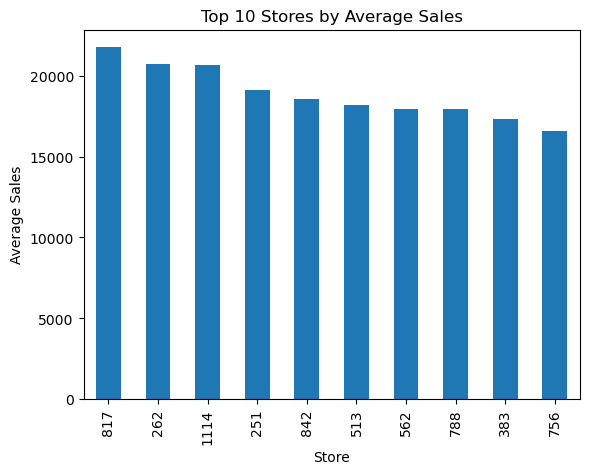

In [32]:
avg_sales_store = sales_merged_df.groupby('Store')['Sales'].mean().sort_values(ascending = False)
print(avg_sales_store)

avg_sales_store.head(10).plot(kind='bar', title='Top 10 Stores by Average Sales', xlabel='Store', ylabel='Average Sales')
plt.show()

In [33]:
#Look into the characteristics of top-performing stores (e.g., StoreType, Assortment)

top_stores = sales_merged_df[sales_merged_df['Store'].isin(avg_sales_store.head(10).index)]
print(top_stores[['Store', 'StoreType', 'Assortment']].drop_duplicates())

         Store StoreType Assortment
227220     251         a          c
237398     262         b          a
348620     383         a          c
467216     513         a          a
511718     562         b          c
687658     756         a          c
717066     788         a          c
743464     817         a          a
766646     842         d          c
1015325   1114         a          c


### Are There Spikes in Sales During Specific Seasons or Holidays?


In [34]:
#Sales during State Holidays
sales_by_state_holiday = sales_merged_df.groupby('StateHoliday')['Sales'].mean()
print(sales_by_state_holiday)

#Sales during School Holidays

sales_by_school_holiday = sales_merged_df.groupby('SchoolHoliday')['Sales'].mean()
print(sales_by_school_holiday)

StateHoliday
0    6701.492117
0    6992.158856
a    8487.471182
b    9887.889655
c    9743.746479
Name: Sales, dtype: float64
SchoolHoliday
0    6896.782411
1    7200.181650
Name: Sales, dtype: float64


In [35]:
print(sales_merged_df['StateHoliday'].unique())

print(sales_merged_df['StateHoliday'].dtype)
#One 0 is a string ('0'), The other is an integer (0).This can happen due to inconsistent data entry or merging datasets 

['0' 0 'a' 'b' 'c']
object


In [36]:
# convert all to string 
sales_merged_df['StateHoliday'] = sales_merged_df['StateHoliday'].astype(str)

print(sales_merged_df['StateHoliday'].dtype)

sales_by_state_holiday = sales_merged_df.groupby('StateHoliday')['Sales'].mean()
print(sales_by_state_holiday)

object
StateHoliday
0    6953.515034
a    8487.471182
b    9887.889655
c    9743.746479
Name: Sales, dtype: float64


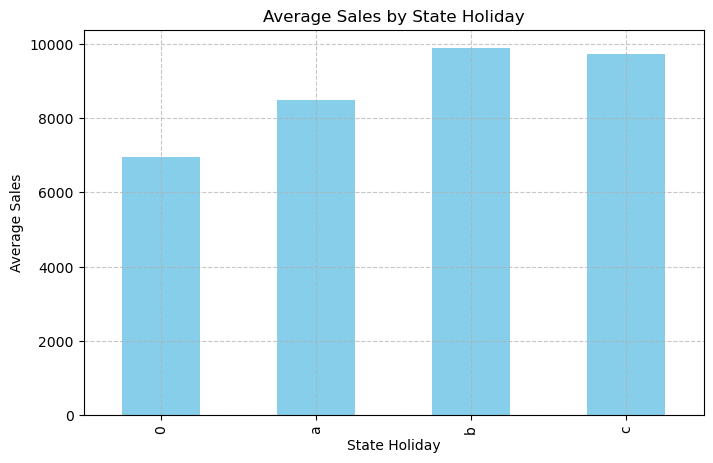

In [43]:
sales_by_state_holiday.plot(kind = 'bar', figsize =(8,5), color = 'skyblue')
plt.title('Average Sales by State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [44]:

# Group by StateHoliday and SchoolHoliday and calculate the mean of open stores
holiday_open_check = sales_merged_df.groupby(['StateHoliday', 'SchoolHoliday'])['Sales'].mean()
print(holiday_open_check)

StateHoliday  SchoolHoliday
0             0                 6895.153041
              1                 7196.896238
a             0                 8492.066102
              1                 8461.403846
b             0                34781.166667
              1                 8813.359712
c             1                 9743.746479
Name: Sales, dtype: float64


In [52]:
# #this is important to ensure 'StateHoliday' and 'SchoolHoliday' are columns
holiday_open_check = holiday_open_check.reset_index()

In [53]:
holiday_open_check

,StateHoliday,SchoolHoliday,Sales
0,0,0,6895.153041
1,0,1,7196.896238
2,a,0,8492.066102
3,a,1,8461.403846
4,b,0,34781.166667
5,b,1,8813.359712
6,c,1,9743.746479


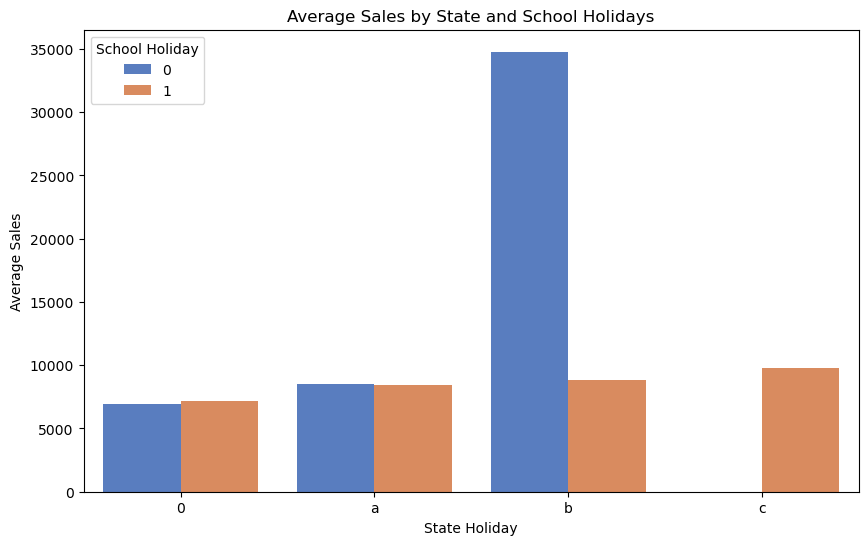

In [54]:

plt.figure(figsize=(10, 6))
sns.barplot(
    data=holiday_open_check,
    x='StateHoliday',
    y='Sales',
    hue='SchoolHoliday',
    palette='muted'
)
plt.title('Average Sales by State and School Holidays')
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')
plt.legend(title='School Holiday')
plt.show()

### Analyse Seasonal Trends
### Summer and Winter have highest average Sales

In [55]:

sales_merged_df['Season'] = sales_merged_df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})

# Sales by Season
sales_by_season = sales_merged_df.groupby('Season')['Sales'].mean()
print(sales_by_season)

Season
Autumn    6775.744547
Spring    7041.472306
Summer    6896.355321
Winter    7048.121187
Name: Sales, dtype: float64


#### What Are the Busiest Months for States with Specific Assortment?

In [56]:
sales_by_assortment_month = sales_merged_df.groupby(['Assortment', 'Month'])['Sales'].mean().unstack()
print(sales_by_assortment_month)

Month                1            2            3            4            5   \
Assortment                                                                    
a           6298.498704  6299.317702  6646.173581  6738.367566  6775.956707   
b           7580.068293  8279.352703  8582.962594  8727.935930  9131.075269   
c           6850.096021  6891.021259  7324.909116  7366.195527  7440.756410   

Month                6            7            8            9            10  \
Assortment                                                                    
a           6675.527677  6595.588953  6243.296228  6243.884974  6330.471477   
b           8999.653086  8852.003722  7949.796964  8254.686275  8616.470588   
c           7332.085144  7315.012865  7071.430700  6846.233865  6862.190429   

Month                11           12  
Assortment                            
a           6814.742229  8079.383834  
b           9139.943137  9685.263757  
c           7563.059480  9174.829370  


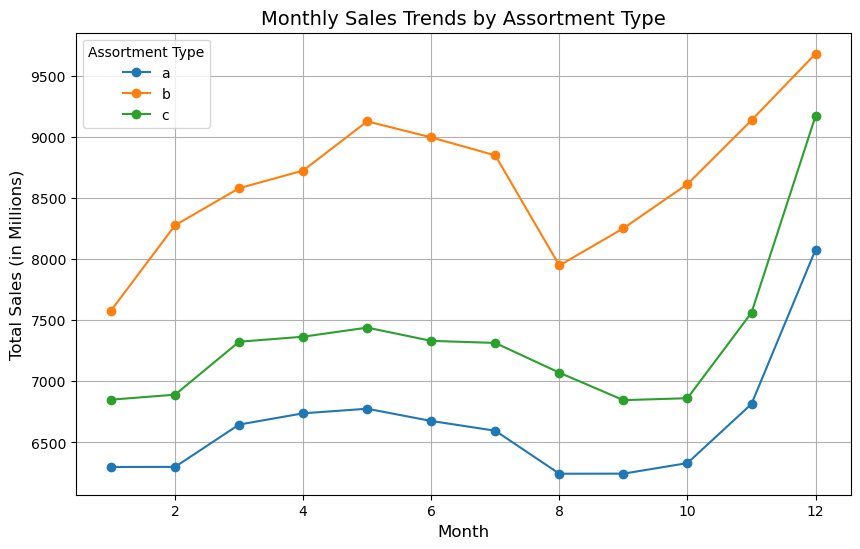

In [57]:
# originally the graph x label is assortment, use after transpose Rows: Months (1–12).Columns: Assortment types (a, b, c).
sales_by_assortment_month.T.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Monthly Sales Trends by Assortment Type', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (in Millions)', fontsize=12)
plt.legend(title = 'Assortment Type')
plt.grid(True) #line background
plt.show()

### What days or months bring most customers

In [58]:
# assume the store is open 

customer_by_day = sales_merged_df.groupby('DayOfWeek')['Customers'].mean().sort_values(ascending = False)
print(customer_by_day)

customer_by_month = sales_merged_df.groupby('Month')['Customers'].mean().sort_values(ascending = False)
print(customer_by_month)

DayOfWeek
6    1441.532424
0     855.444984
4     781.771639
1     769.986753
3     755.569784
2     740.598876
5     660.177526
Name: Customers, dtype: float64
Month
12    886.630385
11    782.671543
5     779.290214
4     774.271806
6     759.277357
3     759.081600
7     752.745522
10    752.573557
8     750.384706
9     745.613988
2     731.504792
1     722.514749
Name: Customers, dtype: float64


In [59]:

customer_by_day = sales_merged_df.groupby('DayOfWeek')['Customers'].sum().sort_values(ascending = False)
print(customer_by_day)

customer_by_month = sales_merged_df.groupby('Month')['Customers'].sum().sort_values(ascending = False)
print(customer_by_month)

DayOfWeek
0    117675012
1    110848063
4    108384820
2    105117642
3    101732938
5     95103854
6      5179426
Name: Customers, dtype: int64
Month
3     65265836
7     64425231
4     63282009
6     62698087
5     62423484
1     62384091
2     58698139
12    44679965
8     40830683
11    40230100
10    40106150
9     39017980
Name: Customers, dtype: int64


### Are Customers are more likely to visit during promotions or holidays

In [60]:
customer_by_promo = sales_merged_df[ sales_merged_df['Promo']==1]['Customers'].mean()
print(f"Average number of customers Per day with promotion : {customer_by_promo}")

customer_no_promo =  sales_merged_df[ sales_merged_df['Promo']==0]['Customers'].mean()
print(f"Average number of customers Per day with no promotion : {customer_no_promo}")

Average number of customers Per day with promotion : 844.4344010018679
Average number of customers Per day with no promotion : 696.856886476034


In [61]:
#with no holidays
no_holidays =  sales_merged_df[( sales_merged_df['StateHoliday'] == 0) & ( sales_merged_df['SchoolHoliday'] == 0)]['Customers'].mean()

print(f"Average number of customers with no holiday: {no_holidays}")

#with only state holidays
state_holiday =  sales_merged_df[( sales_merged_df['StateHoliday']==1) & ( sales_merged_df['SchoolHoliday']==0)]['Customers'].mean()
print(f"Average number of customers with only state holiday: {state_holiday}")

#with only school holidays
school_holiday =  sales_merged_df[( sales_merged_df['StateHoliday']==0)&( sales_merged_df['SchoolHoliday']==1)]['Customers'].mean()
print(f"Average number of customers with only school holiday: {school_holiday}")

combine_holiday =  sales_merged_df[( sales_merged_df['StateHoliday']==1) & ( sales_merged_df['SchoolHoliday']==1)]['Customers'].mean()
print(f"Average number of customers with only school holiday: {combine_holiday}")


Average number of customers with no holiday: nan
Average number of customers with only state holiday: nan
Average number of customers with only school holiday: nan
Average number of customers with only school holiday: nan


In [62]:
# why above show the nan ? 
print( sales_merged_df['StateHoliday'].unique())

# Check unique values in the SchoolHoliday column
print( sales_merged_df['SchoolHoliday'].unique())

['0' 'a' 'b' 'c']
[1 0]


In [63]:
no_holidays = sales_merged_df[(sales_merged_df['StateHoliday'] == '0') & ( sales_merged_df['SchoolHoliday'] == 0)]['Customers'].mean()

print(f"Average number of customers with no holiday: {no_holidays}")

#with only state holidays
state_holiday = sales_merged_df[( sales_merged_df['StateHoliday'] !='0' ) & ( sales_merged_df['SchoolHoliday']==0)]['Customers'].mean()
print(f"Average number of customers with only state holiday: {state_holiday}")

#with only school holidays
school_holiday =  sales_merged_df[( sales_merged_df['StateHoliday']=='0')&( sales_merged_df['SchoolHoliday']==1)]['Customers'].mean()
print(f"Average number of customers with only school holiday: {school_holiday}")

combine_holiday =  sales_merged_df[( sales_merged_df['StateHoliday']!='0' ) & ( sales_merged_df['SchoolHoliday']==1)]['Customers'].mean()
print(f"Average number of customers with only school holiday: {combine_holiday}")


Average number of customers with no holiday: 757.3542998416966
Average number of customers with only state holiday: 1304.4697986577182
Average number of customers with only school holiday: 781.7701525655407
Average number of customers with only school holiday: 1485.0191082802548


### Promotion Analysis
#### 1. How effective of Promotion


In [64]:
#Average number of customers Per day with promotion : 844.43
#Average number of customers Per day with no promotion : 696.85

sales_by_promo = sales_merged_df[sales_merged_df['Promo'] ==1]['Sales'].mean()
print(f"Average Sales with promotion :{sales_by_promo}")

sales_no_promo =sales_merged_df[sales_merged_df['Promo'] ==0]['Sales'].mean()
print(f"Average Sales without promotion :{sales_no_promo}")

Average Sales with promotion :8228.281239386994
Average Sales without promotion :5929.407603487516


In [65]:
print(sales_merged_df['Promo'].unique())

# Check unique values in the SchoolHoliday column
print(sales_merged_df['Promo2'].unique())

[1 0]
[0 1]


In [66]:
#compare the sales with 1 and 2 promotion
sales_one_promo = sales_merged_df[(sales_merged_df['Promo']==1)&(sales_merged_df['Promo2']==0)]['Sales'].mean()
print(f"Average Sales with only 1 promotion:{sales_one_promo}")

sales_two_promo = sales_merged_df[(sales_merged_df['Promo']==1)&(sales_merged_df['Promo2']==1)]['Sales'].mean()
print(f"Average Sales with 2 promotion:{sales_two_promo}")

percentage_decrease = ((sales_one_promo - sales_two_promo) / sales_one_promo) * 100
print(percentage_decrease)

Average Sales with only 1 promotion:8618.132880452034
Average Sales with 2 promotion:7836.0890443039325
9.074399838066578


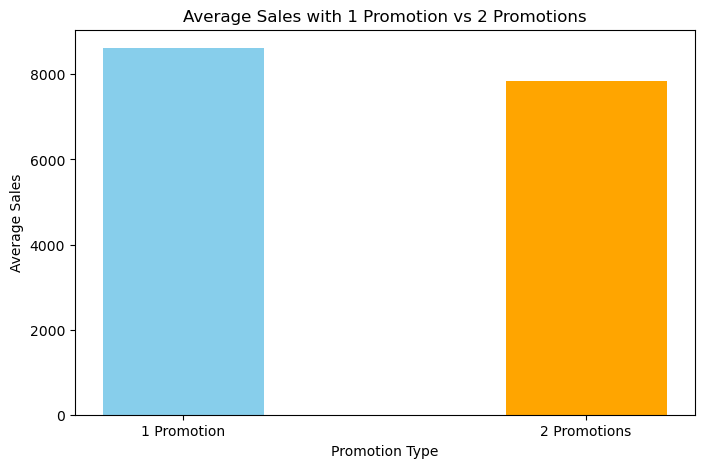

In [70]:
categories = ['1 Promotion', '2 Promotions']
values = [sales_one_promo, sales_two_promo ]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['skyblue', 'orange'], width=0.4)
plt.title('Average Sales with 1 Promotion vs 2 Promotions')
plt.ylabel('Average Sales')
plt.xlabel('Promotion Type')
plt.show()

### How does the distance to competitors affect store sales 

In [73]:
print(sales_merged_df['CompetitionDistance'].isnull().sum())
print(sales_merged_df['CompetitionDistance'].describe())

0
count    844392.000000
mean       5457.842215
std        7799.322503
min          20.000000
25%         710.000000
50%        2330.000000
75%        6880.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64


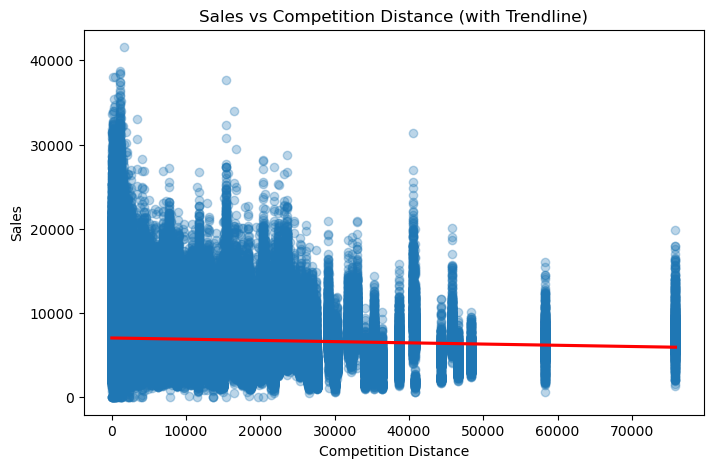

In [76]:
#Visualise the Relationship between distance and sales

plt.figure(figsize = (8,5))
sns.regplot(
    x = 'CompetitionDistance',
    y = 'Sales',
    data = sales_merged_df,
    scatter_kws = {'alpha': 0.3},
    line_kws = {'color':'red'} )

plt.title('Sales vs Competition Distance (with Trendline)')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()


In [77]:
correlation = sales_merged_df['CompetitionDistance'].corr(sales_merged_df['Sales'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: -0.036343460450785785


DistanceBin
0-1k       7301.654210
1k-5k      6836.022135
5k-10k     6720.383748
10k-20k    6732.882961
20k-50k    7022.882555
>50k       7119.471783
Name: Sales, dtype: float64


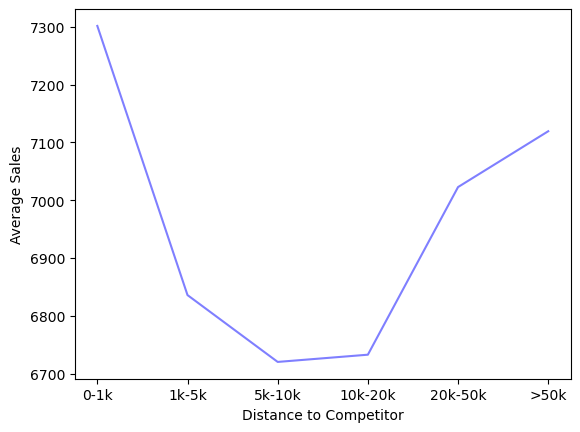

In [84]:
#Divide the data into bins based on CompetitionDistance

sales_merged_df['DistanceBin'] = pd.cut(
    sales_merged_df['CompetitionDistance'], 
    bins=[0, 1000, 5000, 10000, 20000, 50000, float('inf')], 
    labels=['0-1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '>50k']
)
avg_sales_by_bin = sales_merged_df.groupby('DistanceBin')['Sales'].mean()
print(avg_sales_by_bin)
avg_sales_by_bin.plot(kind='line', color = 'b', alpha = 0.5)
plt.title = ('Average Sales by Competition Distance Bin')
plt.xlabel('Distance to Competitor')
plt.ylabel('Average Sales')
plt.show()

In [53]:
#Check Correlation
correlation = sales_merged_df['CompetitionDistance'].corr(sales_merged_df['Sales'])
print(f"Correlation between Competition Distance and Sales: {correlation}")


import statsmodels.api as sm

X = sales_merged_df['CompetitionDistance']
y = sales_merged_df['Sales']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

Correlation between Competition Distance and Sales: -0.036343460450785785
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1117.
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.07e-244
Time:                        14:09:54   Log-Likelihood:            -7.9869e+06
No. Observations:              844392   AIC:                         1.597e+07
Df Residuals:                  844390   BIC:                         1.597e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

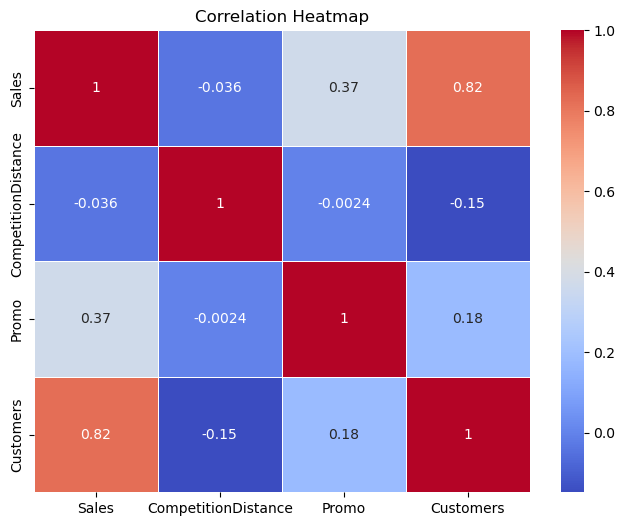

In [54]:
#check other factors relationship with distance
correlation_matrix = sales_merged_df[['Sales', 'CompetitionDistance', 'Promo', 'Customers']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [55]:
sales_merged_df['DistanceBin'] = pd.cut(
    sales_merged_df['CompetitionDistance'], 
    bins=[0, 1000, 5000, float('inf')], 
    labels=['0-1k', '1k-5k', '>5k']
)


avg_customers = sales_merged_df.groupby(['Promo', 'DistanceBin'])['Customers'].mean()
print(avg_customers)

Promo  DistanceBin
0      0-1k            848.551671
       1k-5k           673.618906
       >5k             582.503224
1      0-1k           1018.961243
       1k-5k           809.424979
       >5k             723.221893
Name: Customers, dtype: float64


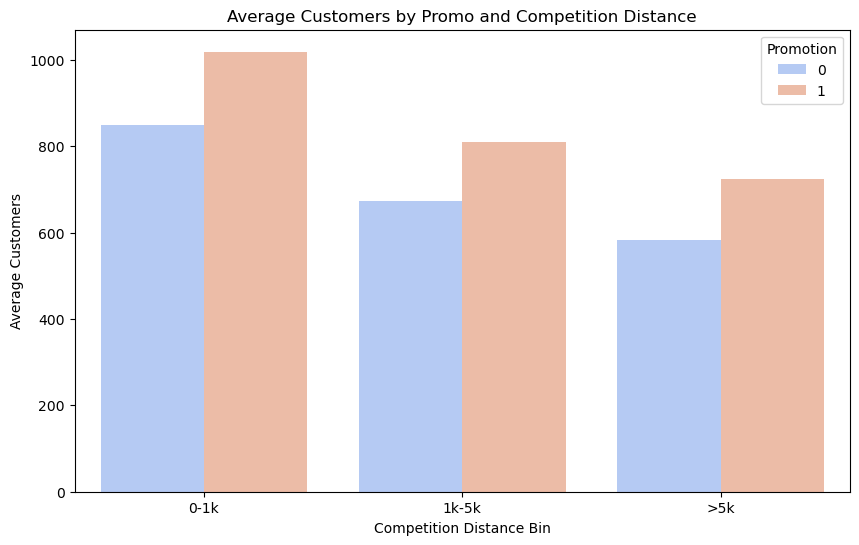

In [56]:

avg_customers_plot = sales_merged_df.groupby(['Promo', 'DistanceBin'])['Customers'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='DistanceBin', y='Customers', hue='Promo', data=avg_customers_plot, palette='coolwarm')
plt.title('Average Customers by Promo and Competition Distance')
plt.xlabel('Competition Distance Bin')
plt.ylabel('Average Customers')
plt.legend(title='Promotion')
plt.show()

In [57]:
sales_merged_df.columns

Index(['Store', 'DayOfWeek', 'TransactionDate', 'Sales', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Season',
       'DistanceBin'],
      dtype='object')

In [58]:
sales_merged_df.isnull().sum()

Store                        0
DayOfWeek                    0
TransactionDate              0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Season                       0
DistanceBin                  0
dtype: int64

In [59]:
sales_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   TransactionDate            844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   Year                       844392 non-null  int64         
 10  Month                      844392 non-null  int64         
 11  Day                        844392 non-null  int64  

In [60]:
sales_merged_df['Year'].unique()

array([2015, 2014, 2013])

In [61]:
sales_merged_df['TransactionDate'].max()

Timestamp('2015-07-31 00:00:00')

/var/folders/y0/v8s1rk113f5gqq_dvtthdf840000gn/T/ipykernel_99607/1657729539.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sales_merged_df.corr()


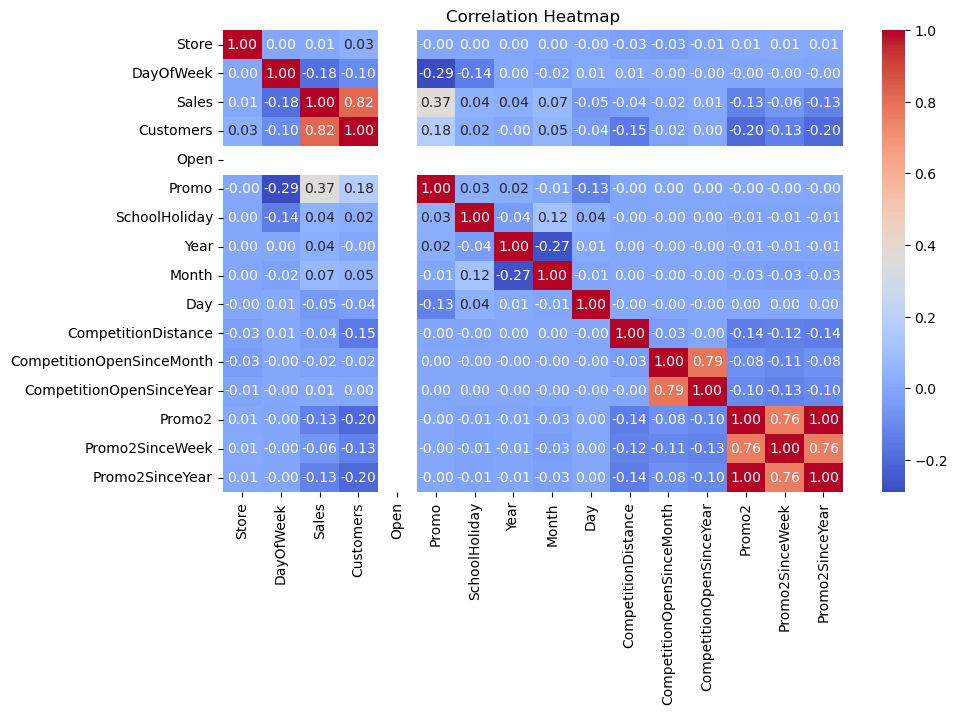

In [62]:
correlation_matrix = sales_merged_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [63]:
sales_merged_df['DayOfWeek'].unique()

array([4, 3, 2, 1, 0, 5, 6])

### Engineering new features


In [64]:
#Create a binary feature for IsWeekend (1 if Saturday or Sunday, 0 otherwise).
sales_merged_df['IsWeekend'] = sales_merged_df['DayOfWeek'].isin([5, 6]).astype(int)


sales_merged_df['Season'] = sales_merged_df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})

### Normalise the data 

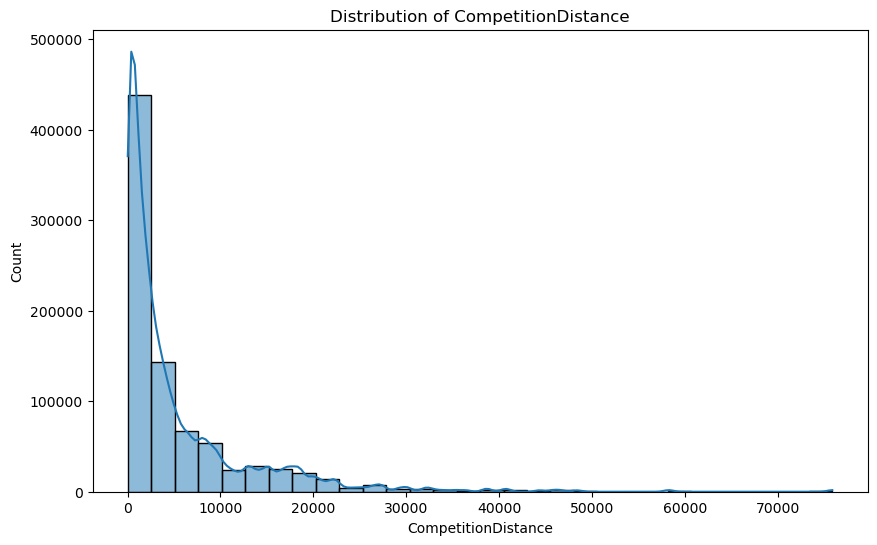

In [65]:
#check the distribution of competition distance

plt.figure(figsize=(10, 6))
sns.histplot(sales_merged_df['CompetitionDistance'], kde=True, bins=30)
plt.title('Distribution of CompetitionDistance')
plt.show()

In [66]:
sales_merged_df['Log_CompetitionDistance'] = np.log1p(sales_merged_df['CompetitionDistance'])

###  Handling multicollinearity

In [67]:

sales_merged_df = sales_merged_df.drop(columns=['CompetitionOpenSinceYear'])

###  Encoding Categorical Variables

In [68]:
#One-Hot Encoding:StoreType or Assortment

sales_merged_df = pd.get_dummies(sales_merged_df, columns=['StoreType', 'Assortment'], drop_first=True)
#One category (e.g., 'a') is dropped to avoid redundancy. stype b and stype c = 0 is type a 

#Ordinal encoding:
sales_merged_df['Season'] = sales_merged_df['Season'].map({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4})



In [69]:
sales_merged_df['Lag1_customers'] = sales_merged_df['Customers'].shift(1)

In [70]:
sales_merged_df

,Store,DayOfWeek,TransactionDate,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Season,DistanceBin,IsWeekend,Log_CompetitionDistance,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Lag1_customers
0,1,4,2015-07-31,5263,555,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,NaN
1,1,3,2015-07-30,5020,546,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,555.0
2,1,2,2015-07-29,4782,523,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,546.0
3,1,1,2015-07-28,5011,560,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,523.0
4,1,0,2015-07-27,6102,612,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,0,2013-01-07,6905,471,1,1,0,1,2013,...,1,>5k,0,8.585039,0,0,1,0,1,341.0
1017204,1115,5,2013-01-05,4771,339,1,0,0,1,2013,...,1,>5k,1,8.585039,0,0,1,0,1,471.0
1017205,1115,4,2013-01-04,4540,326,1,0,0,1,2013,...,1,>5k,0,8.585039,0,0,1,0,1,339.0
1017206,1115,3,2013-01-03,4297,300,1,0,0,1,2013,...,1,>5k,0,8.585039,0,0,1,0,1,326.0


In [71]:
sales_merged_df.columns

Index(['Store', 'DayOfWeek', 'TransactionDate', 'Sales', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Season',
       'DistanceBin', 'IsWeekend', 'Log_CompetitionDistance', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c',
       'Lag1_customers'],
      dtype='object')

In [72]:
sales_merged_df

,Store,DayOfWeek,TransactionDate,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Season,DistanceBin,IsWeekend,Log_CompetitionDistance,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Lag1_customers
0,1,4,2015-07-31,5263,555,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,NaN
1,1,3,2015-07-30,5020,546,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,555.0
2,1,2,2015-07-29,4782,523,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,546.0
3,1,1,2015-07-28,5011,560,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,523.0
4,1,0,2015-07-27,6102,612,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,0,2013-01-07,6905,471,1,1,0,1,2013,...,1,>5k,0,8.585039,0,0,1,0,1,341.0
1017204,1115,5,2013-01-05,4771,339,1,0,0,1,2013,...,1,>5k,1,8.585039,0,0,1,0,1,471.0
1017205,1115,4,2013-01-04,4540,326,1,0,0,1,2013,...,1,>5k,0,8.585039,0,0,1,0,1,339.0
1017206,1115,3,2013-01-03,4297,300,1,0,0,1,2013,...,1,>5k,0,8.585039,0,0,1,0,1,326.0


In [73]:
sales_merged_df['Lag1_customers'].fillna(0, inplace=True)
sales_merged_df

,Store,DayOfWeek,TransactionDate,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Season,DistanceBin,IsWeekend,Log_CompetitionDistance,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Lag1_customers
0,1,4,2015-07-31,5263,555,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,0.0
1,1,3,2015-07-30,5020,546,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,555.0
2,1,2,2015-07-29,4782,523,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,546.0
3,1,1,2015-07-28,5011,560,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,523.0
4,1,0,2015-07-27,6102,612,1,1,0,1,2015,...,3,1k-5k,0,7.147559,0,1,0,0,0,560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,0,2013-01-07,6905,471,1,1,0,1,2013,...,1,>5k,0,8.585039,0,0,1,0,1,341.0
1017204,1115,5,2013-01-05,4771,339,1,0,0,1,2013,...,1,>5k,1,8.585039,0,0,1,0,1,471.0
1017205,1115,4,2013-01-04,4540,326,1,0,0,1,2013,...,1,>5k,0,8.585039,0,0,1,0,1,339.0
1017206,1115,3,2013-01-03,4297,300,1,0,0,1,2013,...,1,>5k,0,8.585039,0,0,1,0,1,326.0


### Predicting Slaes


In [74]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [75]:
features = ['DayOfWeek', 'Customers','Promo', 'SchoolHoliday','Month', 
            'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2','Promo2SinceWeek',
            'Season', 'IsWeekend', 'StoreType_b', 'StoreType_c', 'StoreType_d',
            'Assortment_b', 'Assortment_c']
target = 'Sales'


X = sales_merged_df[features]
y = sales_merged_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=10, max_depth=10, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 734.9370990538226
Root Mean Squared Error: 1002.6005331335089
R-squared: 0.8953229202086433


In [76]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).reset_index(drop=True)

### The red (predicted) and blue (actual) lines overlap closely, it means the model performs well.

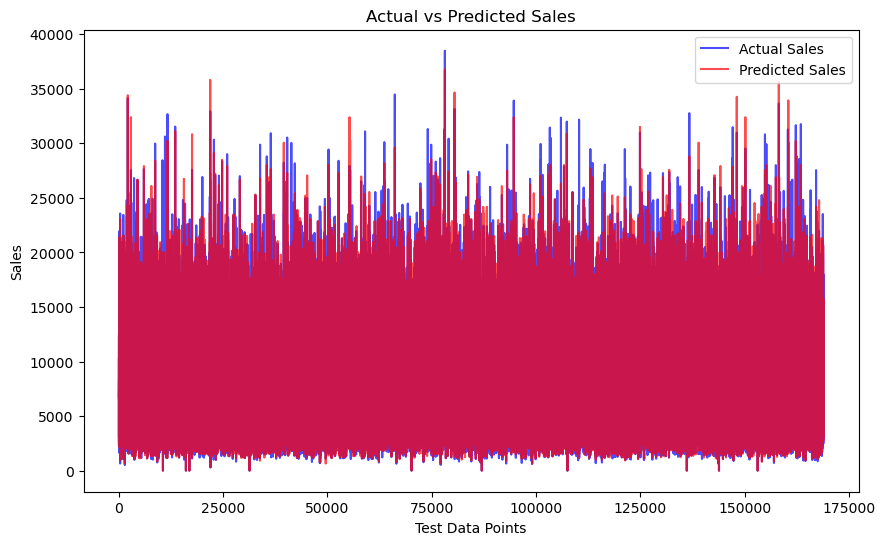

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual'], label='Actual Sales', color='blue', alpha=0.7)
plt.plot(results_df['Predicted'], label='Predicted Sales', color='red', alpha=0.7)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Data Points')
plt.ylabel('Sales')
plt.legend()
plt.show()